# Analysis of trajectories with regards to system dynamics

I produced sets of trajectories for different values of ecosystem and trade income to see whether they resulted in a stable, trade supported society or predator prey cycles for society and ecosystem.

Therefore, I want to calculate some measure, that tell me whether the trajectories are primarily noise around a stable value or wheter they are oscillating in some sort of chaotic attractor.

First, lets see how the trajectories are saved.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it

from ipywidgets import IntProgress
from IPython.display import display

In [2]:
all_data = pd.read_pickle('/home/jakob/Project_MayaSim/output_data/X10_trajectories/results/all_trajectories')
all_data.head()

key                                                trajectory_list  \
r_trade r_es                                                         
4000    0.00008        time  total_population  max settlement p...   
        0.00009        time  total_population  max settlement p...   
        0.00010        time  total_population  max settlement p...   
        0.00011        time  total_population  max settlement p...   
        0.00012        time  total_population  max settlement p...   

key                                                trajectory_list  \
r_trade r_es                                                         
4000    0.00008        time  total_population  max settlement p...   
        0.00009        time  total_population  max settlement p...   
        0.00010        time  total_population  max settlement p...   
        0.00011        time  total_population  max settlement p...   
        0.00012        time  total_population  max settlement p...   

key                                                trajectory_list  \
r_trade r_es                                                         
4000    0.00008        time  total_population  max settlement p...   
        0.00009        time  total_population  max settlement p...   
        0.00010        time  total_population  max settlement p...   
        0.00011        time  total_population  max settlement p...   
        0.00012        time  total_population  max settlement p...   

key                                                trajectory_list  \
r_trade r_es                                                         
4000    0.00008        time  total_population  max settlement p...   
        0.00009        time  total_population  max settlement p...   
        0.00010        time  total_population  max settlement p...   
        0.00011        time  total_population  max settlement p...   
        0.00012        time  total_population  max settlement p...   

key                                                trajectory_list  \
r_trade r_es                                                         
4000    0.00008        time  total_population  max settlement p...   
        0.00009        time  total_population  max settlement p...   
        0.00010        time  total_population  max settlement p...   
        0.00011        time  total_population  max settlement p...   
        0.00012        time  total_population  max settlement p...   

key                                                trajectory_list  \
r_trade r_es                                                         
4000    0.00008        time  total_population  max settlement p...   
        0.00009        time  total_population  max settlement p...   
        0.00010        time  total_population  max settlement p...   
        0.00011        time  total_population  max settlement p...   
        0.00012        time  total_population  max settlement p...   

key                                                trajectory_list  \
r_trade r_es                                                         
4000    0.00008        time  total_population  max settlement p...   
        0.00009        time  total_population  max settlement p...   
        0.00010        time  total_population  max settlement p...   
        0.00011        time  total_population  max settlement p...   
        0.00012        time  total_population  max settlement p...   

key                                                trajectory_list  \
r_trade r_es                                                         
4000    0.00008        time  total_population  max settlement p...   
        0.00009        time  total_population  max settlement p...   
        0.00010        time  total_population  max settlement p...   
        0.00011        time  total_population  max settlement p...   
        0.00012        time  total_population  max settlement p...   

key                                                trajectory_list  \
r_

To Do:
* construct dataframe with r_trade, r_es and run_id in index and observables in column
* save it in hd5 store
* save index values of observables separately and delete original dataframe from memory.
* load sets of trajectories separately to compute indicators.

In [3]:
data = all_data.copy()
nruns = len(data.columns.values)
index = pd.Index(range(nruns))
index.name = 'run_id'
data.columns = index
data = data.stack('run_id')
empty_df = pd.DataFrame(index=data.index)
empty_df.to_pickle('index.pkl')
data.head()

r_trade  r_es     run_id
4000     0.00008  0               time  total_population  max settlement p...
                  1               time  total_population  max settlement p...
                  2               time  total_population  max settlement p...
                  3               time  total_population  max settlement p...
                  4               time  total_population  max settlement p...
dtype: object

**The plots above show the long run data (aggregated from 50 runs) for total population and and different sources of income**

We see:

* initially: strong overshoot and collapse behavior with little variance between runs,
* after: oscillatory behavior with bigger variance between runs.

Lets look at some individual runs to see the actual dynamics.

In [4]:
data_tmp = data.copy()
k, k_max = 0, len(data_tmp)
saved_indices = []

In [5]:
data_tmp = data.copy()
with pd.HDFStore('/home/jakob/Project_MayaSim/output_data/X10_trajectories/results/all_trajectories.hd5') as store:
    app = False
    for i, d in data_tmp.iteritems():
        print(k/k_max*100)
        k += 1
        if i not in saved_indices:
            for val, name in zip(i, ['r_trade', 'r_es', 'run_id']):
                d[name] = val
            d.set_index(['r_trade', 'r_es', 'run_id',  'time'], inplace=True)
            if app:
                try:
                    store.append('d1', d)
                    print(f'{i} saved')
                except:
                    print(f'{i} failed')
            else:
                store.put('d1', d, append=app, format='table', data_columns=True)
            app=True
            saved_indices.append(i)
        else:
            print(f'{i} already saved')
        


0.0


/home/jakob/anaconda3/envs/mayasim/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: 'max settlement population'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/home/jakob/anaconda3/envs/mayasim/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: 'new settlements'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/home/jakob/anaconda3/envs/mayasim/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: 'killed settlements'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural nam

0.024509803921568627
(4000, 8e-05, 1) saved
0.049019607843137254
(4000, 8e-05, 2) saved
0.07352941176470588
(4000, 8e-05, 3) saved
0.09803921568627451
(4000, 8e-05, 4) saved
0.12254901960784313
(4000, 8e-05, 5) saved
0.14705882352941177
(4000, 8e-05, 6) saved
0.1715686274509804
(4000, 8e-05, 7) saved
0.19607843137254902
(4000, 8e-05, 8) saved
0.22058823529411764
(4000, 8e-05, 9) failed
0.24509803921568626
(4000, 8e-05, 10) saved
0.2696078431372549
(4000, 8e-05, 11) saved
0.29411764705882354
(4000, 8e-05, 12) saved
0.31862745098039214
(4000, 8e-05, 13) failed
0.3431372549019608
(4000, 8e-05, 14) saved
0.3676470588235294
(4000, 8e-05, 15) saved
0.39215686274509803
(4000, 8e-05, 16) saved
0.4166666666666667
(4000, 8e-05, 17) saved
0.4411764705882353
(4000, 8e-05, 18) saved
0.46568627450980393
(4000, 8e-05, 19) saved
0.49019607843137253
(4000, 9e-05, 0) saved
0.5147058823529411
(4000, 9e-05, 1) saved
0.5392156862745098
(4000, 9e-05, 2) saved
0.5637254901960784
(4000, 9e-05, 3) failed
0.588

(4000, 0.0001, 150) saved
4.681372549019608
(4000, 0.0001, 151) saved
4.705882352941177
(4000, 0.0001, 152) saved
4.730392156862745
(4000, 0.0001, 153) saved
4.754901960784314
(4000, 0.0001, 154) saved
4.779411764705882
(4000, 0.0001, 155) saved
4.803921568627452
(4000, 0.0001, 156) saved
4.82843137254902
(4000, 0.0001, 157) saved
4.852941176470589
(4000, 0.0001, 158) saved
4.877450980392157
(4000, 0.0001, 159) saved
4.901960784313726
(4000, 0.00011, 0) saved
4.926470588235294
(4000, 0.00011, 1) saved
4.950980392156863
(4000, 0.00011, 2) saved
4.9754901960784315
(4000, 0.00011, 3) saved
5.0
(4000, 0.00011, 4) saved
5.0245098039215685
(4000, 0.00011, 5) saved
5.049019607843137
(4000, 0.00011, 6) saved
5.073529411764706
(4000, 0.00011, 7) saved
5.098039215686274
(4000, 0.00011, 8) saved
5.122549019607843
(4000, 0.00011, 9) saved
5.147058823529411
(4000, 0.00011, 10) saved
5.17156862745098
(4000, 0.00011, 11) saved
5.196078431372549
(4000, 0.00011, 12) saved
5.220588235294118
(4000, 0.000

(4500, 0.0001, 2) saved
9.387254901960784
(4500, 0.0001, 3) saved
9.411764705882353
(4500, 0.0001, 4) saved
9.436274509803921
(4500, 0.0001, 5) saved
9.46078431372549
(4500, 0.0001, 6) saved
9.485294117647058
(4500, 0.0001, 7) saved
9.509803921568627
(4500, 0.0001, 8) saved
9.534313725490195
(4500, 0.0001, 9) saved
9.558823529411764
(4500, 0.0001, 10) saved
9.583333333333334
(4500, 0.0001, 11) saved
9.607843137254903
(4500, 0.0001, 12) saved
9.632352941176471
(4500, 0.0001, 13) saved
9.65686274509804
(4500, 0.0001, 14) saved
9.681372549019608
(4500, 0.0001, 15) saved
9.705882352941178
(4500, 0.0001, 16) saved
9.730392156862745
(4500, 0.0001, 17) saved
9.754901960784315
(4500, 0.0001, 18) saved
9.779411764705882
(4500, 0.0001, 19) saved
9.803921568627452
(4500, 0.0001, 20) saved
9.82843137254902
(4500, 0.0001, 21) saved
9.852941176470589
(4500, 0.0001, 22) saved
9.877450980392156
(4500, 0.0001, 23) saved
9.901960784313726
(4500, 0.0001, 24) saved
9.926470588235293
(4500, 0.0001, 25) sav

(4500, 0.00012, 9) saved
13.970588235294118
(4500, 0.00012, 10) saved
13.995098039215687
(4500, 0.00012, 11) saved
14.019607843137255
(4500, 0.00012, 12) saved
14.044117647058824
(4500, 0.00012, 13) saved
14.068627450980392
(4500, 0.00012, 14) saved
14.093137254901961
(4500, 0.00012, 15) saved
14.117647058823529
(4500, 0.00012, 16) saved
14.142156862745098
(4500, 0.00012, 17) saved
14.166666666666666
(4500, 0.00012, 18) saved
14.191176470588236
(4500, 0.00012, 19) saved
14.215686274509803
(4500, 0.00013, 0) saved
14.240196078431373
(4500, 0.00013, 1) saved
14.26470588235294
(4500, 0.00013, 2) saved
14.28921568627451
(4500, 0.00013, 3) saved
14.313725490196077
(4500, 0.00013, 4) saved
14.338235294117647
(4500, 0.00013, 5) saved
14.362745098039214
(4500, 0.00013, 6) saved
14.387254901960784
(4500, 0.00013, 7) saved
14.411764705882351
(4500, 0.00013, 8) saved
14.436274509803921
(4500, 0.00013, 9) saved
14.460784313725492
(4500, 0.00013, 10) saved
14.48529411764706
(4500, 0.00013, 11) save

(5000, 0.0001, 38) saved
18.602941176470587
(5000, 0.0001, 39) saved
18.627450980392158
(5000, 0.0001, 40) saved
18.651960784313726
(5000, 0.0001, 41) saved
18.676470588235293
(5000, 0.0001, 42) saved
18.700980392156865
(5000, 0.0001, 43) saved
18.725490196078432
(5000, 0.0001, 44) saved
18.75
(5000, 0.0001, 45) saved
18.774509803921568
(5000, 0.0001, 46) saved
18.799019607843135
(5000, 0.0001, 47) saved
18.823529411764707
(5000, 0.0001, 48) saved
18.848039215686274
(5000, 0.0001, 49) saved
18.872549019607842
(5000, 0.0001, 50) saved
18.897058823529413
(5000, 0.0001, 51) saved
18.92156862745098
(5000, 0.0001, 52) saved
18.94607843137255
(5000, 0.0001, 53) saved
18.970588235294116
(5000, 0.0001, 54) saved
18.995098039215684
(5000, 0.0001, 55) saved
19.019607843137255
(5000, 0.0001, 56) saved
19.044117647058822
(5000, 0.0001, 57) saved
19.06862745098039
(5000, 0.0001, 58) saved
19.09313725490196
(5000, 0.0001, 59) saved
19.11764705882353
(5000, 0.0001, 60) saved
19.1421568627451
(5000, 0

(5000, 0.00014, 5) saved
23.186274509803923
(5000, 0.00014, 6) saved
23.21078431372549
(5000, 0.00014, 7) saved
23.235294117647058
(5000, 0.00014, 8) saved
23.25980392156863
(5000, 0.00014, 9) saved
23.284313725490197
(5000, 0.00014, 10) saved
23.308823529411764
(5000, 0.00014, 11) saved
23.333333333333332
(5000, 0.00014, 12) saved
23.357843137254903
(5000, 0.00014, 13) saved
23.38235294117647
(5000, 0.00014, 14) saved
23.40686274509804
(5000, 0.00014, 15) saved
23.431372549019606
(5000, 0.00014, 16) saved
23.455882352941178
(5000, 0.00014, 17) saved
23.480392156862745
(5000, 0.00014, 18) saved
23.504901960784313
(5000, 0.00014, 19) saved
23.52941176470588
(5000, 0.00015, 0) saved
23.55392156862745
(5000, 0.00015, 1) saved
23.57843137254902
(5000, 0.00015, 2) saved
23.602941176470587
(5000, 0.00015, 3) saved
23.627450980392155
(5000, 0.00015, 4) saved
23.651960784313726
(5000, 0.00015, 5) saved
23.676470588235293
(5000, 0.00015, 6) saved
23.70098039215686
(5000, 0.00015, 7) saved
23.72

(5500, 0.0001, 75) saved
27.84313725490196
(5500, 0.0001, 76) saved
27.86764705882353
(5500, 0.0001, 77) saved
27.8921568627451
(5500, 0.0001, 78) saved
27.916666666666668
(5500, 0.0001, 79) saved
27.941176470588236
(5500, 0.0001, 80) saved
27.965686274509803
(5500, 0.0001, 81) saved
27.990196078431374
(5500, 0.0001, 82) saved
28.014705882352942
(5500, 0.0001, 83) saved
28.03921568627451
(5500, 0.0001, 84) saved
28.063725490196077
(5500, 0.0001, 85) saved
28.08823529411765
(5500, 0.0001, 86) saved
28.112745098039216
(5500, 0.0001, 87) saved
28.137254901960784
(5500, 0.0001, 88) saved
28.16176470588235
(5500, 0.0001, 89) saved
28.186274509803923
(5500, 0.0001, 90) saved
28.21078431372549
(5500, 0.0001, 91) saved
28.235294117647058
(5500, 0.0001, 92) saved
28.259803921568626
(5500, 0.0001, 93) saved
28.284313725490197
(5500, 0.0001, 94) saved
28.308823529411764
(5500, 0.0001, 95) saved
28.333333333333332
(5500, 0.0001, 96) saved
28.3578431372549
(5500, 0.0001, 97) saved
28.38235294117647

(5500, 0.00016, 2) saved
32.4264705882353
(5500, 0.00016, 3) saved
32.450980392156865
(5500, 0.00016, 4) saved
32.47549019607843
(5500, 0.00016, 5) saved
32.5
(5500, 0.00016, 6) saved
32.52450980392157
(5500, 0.00016, 7) saved
32.549019607843135
(5500, 0.00016, 8) saved
32.57352941176471
(5500, 0.00016, 9) saved
32.59803921568628
(5500, 0.00016, 10) saved
32.622549019607845
(5500, 0.00016, 11) saved
32.64705882352941
(5500, 0.00016, 12) saved
32.67156862745098
(5500, 0.00016, 13) saved
32.69607843137255
(5500, 0.00016, 14) saved
32.720588235294116
(5500, 0.00016, 15) saved
32.745098039215684
(5500, 0.00016, 16) saved
32.76960784313726
(5500, 0.00016, 17) saved
32.794117647058826
(5500, 0.00016, 18) saved
32.818627450980394
(5500, 0.00016, 19) saved
32.84313725490196
(5500, 0.00017, 0) saved
32.86764705882353
(5500, 0.00017, 1) saved
32.8921568627451
(5500, 0.00017, 2) saved
32.916666666666664
(5500, 0.00017, 3) saved
32.94117647058823
(5500, 0.00017, 4) saved
32.96568627450981
(5500, 0

(6000, 0.0001, 114) saved
37.13235294117647
(6000, 0.0001, 115) saved
37.15686274509804
(6000, 0.0001, 116) saved
37.181372549019606
(6000, 0.0001, 117) saved
37.205882352941174
(6000, 0.0001, 118) saved
37.23039215686275
(6000, 0.0001, 119) saved
37.254901960784316
(6000, 0.0001, 120) saved
37.279411764705884
(6000, 0.0001, 121) saved
37.30392156862745
(6000, 0.0001, 122) saved
37.32843137254902
(6000, 0.0001, 123) saved
37.35294117647059
(6000, 0.0001, 124) saved
37.377450980392155
(6000, 0.0001, 125) saved
37.40196078431373
(6000, 0.0001, 126) saved
37.4264705882353
(6000, 0.0001, 127) saved
37.450980392156865
(6000, 0.0001, 128) saved
37.47549019607843
(6000, 0.0001, 129) saved
37.5
(6000, 0.0001, 130) saved
37.52450980392157
(6000, 0.0001, 131) saved
37.549019607843135
(6000, 0.0001, 132) saved
37.5735294117647
(6000, 0.0001, 133) saved
37.59803921568627
(6000, 0.0001, 134) saved
37.622549019607845
(6000, 0.0001, 135) saved
37.64705882352941
(6000, 0.0001, 136) saved
37.6715686274

(6500, 8e-05, 4) saved
41.78921568627451
(6500, 8e-05, 5) saved
41.81372549019608
(6500, 8e-05, 6) saved
41.838235294117645
(6500, 8e-05, 7) saved
41.86274509803922
(6500, 8e-05, 8) saved
41.88725490196079
(6500, 8e-05, 9) saved
41.911764705882355
(6500, 8e-05, 10) saved
41.93627450980392
(6500, 8e-05, 11) saved
41.96078431372549
(6500, 8e-05, 12) saved
41.98529411764706
(6500, 8e-05, 13) saved
42.009803921568626
(6500, 8e-05, 14) saved
42.03431372549019
(6500, 8e-05, 15) saved
42.05882352941177
(6500, 8e-05, 16) saved
42.083333333333336
(6500, 8e-05, 17) saved
42.1078431372549
(6500, 8e-05, 18) saved
42.13235294117647
(6500, 8e-05, 19) saved
42.15686274509804
(6500, 9e-05, 0) saved
42.181372549019606
(6500, 9e-05, 1) saved
42.205882352941174
(6500, 9e-05, 2) saved
42.23039215686274
(6500, 9e-05, 3) saved
42.254901960784316
(6500, 9e-05, 4) saved
42.279411764705884
(6500, 9e-05, 5) saved
42.30392156862745
(6500, 9e-05, 6) saved
42.32843137254902
(6500, 9e-05, 7) saved
42.35294117647059

(6500, 0.0001, 155) saved
46.470588235294116
(6500, 0.0001, 156) saved
46.49509803921569
(6500, 0.0001, 157) saved
46.51960784313726
(6500, 0.0001, 158) saved
46.544117647058826
(6500, 0.0001, 159) saved
46.568627450980394
(6500, 0.00011, 0) saved
46.59313725490196
(6500, 0.00011, 1) saved
46.61764705882353
(6500, 0.00011, 2) saved
46.6421568627451
(6500, 0.00011, 3) saved
46.666666666666664
(6500, 0.00011, 4) saved
46.69117647058824
(6500, 0.00011, 5) saved
46.71568627450981
(6500, 0.00011, 6) saved
46.740196078431374
(6500, 0.00011, 7) saved
46.76470588235294
(6500, 0.00011, 8) saved
46.78921568627451
(6500, 0.00011, 9) saved
46.81372549019608
(6500, 0.00011, 10) saved
46.838235294117645
(6500, 0.00011, 11) saved
46.86274509803921
(6500, 0.00011, 12) saved
46.88725490196079
(6500, 0.00011, 13) saved
46.911764705882355
(6500, 0.00011, 14) saved
46.93627450980392
(6500, 0.00011, 15) saved
46.96078431372549
(6500, 0.00011, 16) saved
46.98529411764706
(6500, 0.00011, 17) saved
47.0098039

(7000, 0.0001, 6) saved
51.15196078431372
(7000, 0.0001, 7) saved
51.17647058823529
(7000, 0.0001, 8) saved
51.20098039215686
(7000, 0.0001, 9) saved
51.225490196078425
(7000, 0.0001, 10) saved
51.24999999999999
(7000, 0.0001, 11) saved
51.27450980392156
(7000, 0.0001, 12) saved
51.299019607843135
(7000, 0.0001, 13) saved
51.3235294117647
(7000, 0.0001, 14) saved
51.34803921568627
(7000, 0.0001, 15) saved
51.37254901960784
(7000, 0.0001, 16) saved
51.397058823529406
(7000, 0.0001, 17) saved
51.421568627450974
(7000, 0.0001, 18) saved
51.44607843137254
(7000, 0.0001, 19) saved
51.470588235294116
(7000, 0.0001, 20) saved
51.495098039215684
(7000, 0.0001, 21) saved
51.51960784313725
(7000, 0.0001, 22) saved
51.54411764705882
(7000, 0.0001, 23) saved
51.5686274509804
(7000, 0.0001, 24) saved
51.59313725490197
(7000, 0.0001, 25) saved
51.617647058823536
(7000, 0.0001, 26) saved
51.642156862745104
(7000, 0.0001, 27) saved
51.66666666666667
(7000, 0.0001, 28) saved
51.69117647058824
(7000, 0.

(7000, 0.00012, 15) saved
55.7843137254902
(7000, 0.00012, 16) saved
55.80882352941177
(7000, 0.00012, 17) saved
55.833333333333336
(7000, 0.00012, 18) saved
55.8578431372549
(7000, 0.00012, 19) saved
55.88235294117647
(7000, 0.00013, 0) saved
55.90686274509804
(7000, 0.00013, 1) saved
55.931372549019606
(7000, 0.00013, 2) saved
55.955882352941174
(7000, 0.00013, 3) saved
55.98039215686275
(7000, 0.00013, 4) saved
56.004901960784316
(7000, 0.00013, 5) saved
56.029411764705884
(7000, 0.00013, 6) saved
56.05392156862745
(7000, 0.00013, 7) saved
56.07843137254902
(7000, 0.00013, 8) saved
56.10294117647059
(7000, 0.00013, 9) saved
56.127450980392155
(7000, 0.00013, 10) saved
56.15196078431373
(7000, 0.00013, 11) saved
56.1764705882353
(7000, 0.00013, 12) saved
56.200980392156865
(7000, 0.00013, 13) saved
56.22549019607843
(7000, 0.00013, 14) saved
56.25
(7000, 0.00013, 15) saved
56.27450980392157
(7000, 0.00013, 16) saved
56.299019607843135
(7000, 0.00013, 17) saved
56.3235294117647
(7000,

(7500, 0.0001, 46) saved
60.4656862745098
(7500, 0.0001, 47) saved
60.49019607843137
(7500, 0.0001, 48) saved
60.514705882352935
(7500, 0.0001, 49) saved
60.5392156862745
(7500, 0.0001, 50) saved
60.56372549019608
(7500, 0.0001, 51) saved
60.588235294117645
(7500, 0.0001, 52) saved
60.61274509803921
(7500, 0.0001, 53) saved
60.63725490196078
(7500, 0.0001, 54) saved
60.66176470588235
(7500, 0.0001, 55) saved
60.686274509803916
(7500, 0.0001, 56) saved
60.71078431372548
(7500, 0.0001, 57) saved
60.73529411764705
(7500, 0.0001, 58) saved
60.759803921568626
(7500, 0.0001, 59) saved
60.78431372549019
(7500, 0.0001, 60) saved
60.80882352941176
(7500, 0.0001, 61) saved
60.83333333333333
(7500, 0.0001, 62) saved
60.857843137254896
(7500, 0.0001, 63) saved
60.882352941176464
(7500, 0.0001, 64) saved
60.90686274509803
(7500, 0.0001, 65) saved
60.9313725490196
(7500, 0.0001, 66) saved
60.95588235294118
(7500, 0.0001, 67) saved
60.98039215686275
(7500, 0.0001, 68) saved
61.004901960784316
(7500, 

(7500, 0.00014, 15) saved
65.09803921568627
(7500, 0.00014, 16) saved
65.12254901960785
(7500, 0.00014, 17) saved
65.14705882352942
(7500, 0.00014, 18) saved
65.17156862745098
(7500, 0.00014, 19) saved
65.19607843137256
(7500, 0.00015, 0) saved
65.22058823529412
(7500, 0.00015, 1) saved
65.24509803921569
(7500, 0.00015, 2) saved
65.26960784313725
(7500, 0.00015, 3) saved
65.29411764705883
(7500, 0.00015, 4) saved
65.31862745098039
(7500, 0.00015, 5) saved
65.34313725490196
(7500, 0.00015, 6) saved
65.36764705882354
(7500, 0.00015, 7) saved
65.3921568627451
(7500, 0.00015, 8) saved
65.41666666666667
(7500, 0.00015, 9) saved
65.44117647058823
(7500, 0.00015, 10) saved
65.4656862745098
(7500, 0.00015, 11) saved
65.49019607843137
(7500, 0.00015, 12) saved
65.51470588235294
(7500, 0.00015, 13) saved
65.53921568627452
(7500, 0.00015, 14) saved
65.56372549019608
(7500, 0.00015, 15) saved
65.58823529411765
(7500, 0.00015, 16) saved
65.61274509803921
(7500, 0.00015, 17) saved
65.63725490196079


(8000, 0.0001, 88) saved
69.82843137254902
(8000, 0.0001, 89) saved
69.85294117647058
(8000, 0.0001, 90) saved
69.87745098039215
(8000, 0.0001, 91) saved
69.90196078431372
(8000, 0.0001, 92) saved
69.92647058823529
(8000, 0.0001, 93) saved
69.95098039215686
(8000, 0.0001, 94) saved
69.97549019607843
(8000, 0.0001, 95) saved
70.0
(8000, 0.0001, 96) saved
70.02450980392156
(8000, 0.0001, 97) saved
70.04901960784314
(8000, 0.0001, 98) saved
70.0735294117647
(8000, 0.0001, 99) saved
70.09803921568627
(8000, 0.0001, 100) saved
70.12254901960785
(8000, 0.0001, 101) saved
70.1470588235294
(8000, 0.0001, 102) saved
70.17156862745098
(8000, 0.0001, 103) saved
70.19607843137254
(8000, 0.0001, 104) saved
70.22058823529412
(8000, 0.0001, 105) saved
70.24509803921568
(8000, 0.0001, 106) saved
70.26960784313725
(8000, 0.0001, 107) saved
70.29411764705881
(8000, 0.0001, 108) saved
70.3186274509804
(8000, 0.0001, 109) saved
70.34313725490196
(8000, 0.0001, 110) saved
70.36764705882354
(8000, 0.0001, 1

(8000, 0.00016, 18) saved
74.48529411764706
(8000, 0.00016, 19) saved
74.50980392156863
(8000, 0.00017, 0) saved
74.5343137254902
(8000, 0.00017, 1) saved
74.55882352941177
(8000, 0.00017, 2) saved
74.58333333333333
(8000, 0.00017, 3) saved
74.6078431372549
(8000, 0.00017, 4) saved
74.63235294117648
(8000, 0.00017, 5) saved
74.65686274509804
(8000, 0.00017, 6) saved
74.68137254901961
(8000, 0.00017, 7) saved
74.70588235294117
(8000, 0.00017, 8) saved
74.73039215686275
(8000, 0.00017, 9) saved
74.75490196078431
(8000, 0.00017, 10) saved
74.77941176470588
(8000, 0.00017, 11) saved
74.80392156862746
(8000, 0.00017, 12) saved
74.82843137254902
(8000, 0.00017, 13) saved
74.8529411764706
(8000, 0.00017, 14) saved
74.87745098039215
(8000, 0.00017, 15) saved
74.90196078431373
(8000, 0.00017, 16) saved
74.92647058823529
(8000, 0.00017, 17) saved
74.95098039215686
(8000, 0.00017, 18) saved
74.97549019607843
(8000, 0.00017, 19) saved
75.0
(8500, 8e-05, 0) saved
75.02450980392157
(8500, 8e-05, 1) 

(8500, 0.0001, 131) saved
79.2156862745098
(8500, 0.0001, 132) saved
79.24019607843137
(8500, 0.0001, 133) saved
79.26470588235294
(8500, 0.0001, 134) saved
79.2892156862745
(8500, 0.0001, 135) saved
79.31372549019608
(8500, 0.0001, 136) saved
79.33823529411764
(8500, 0.0001, 137) saved
79.36274509803921
(8500, 0.0001, 138) saved
79.38725490196077
(8500, 0.0001, 139) saved
79.41176470588235
(8500, 0.0001, 140) saved
79.43627450980392
(8500, 0.0001, 141) saved
79.46078431372548
(8500, 0.0001, 142) saved
79.48529411764706
(8500, 0.0001, 143) saved
79.50980392156862
(8500, 0.0001, 144) saved
79.5343137254902
(8500, 0.0001, 145) saved
79.55882352941175
(8500, 0.0001, 146) saved
79.58333333333333
(8500, 0.0001, 147) saved
79.6078431372549
(8500, 0.0001, 148) saved
79.63235294117646
(8500, 0.0001, 149) saved
79.65686274509804
(8500, 0.0001, 150) saved
79.6813725490196
(8500, 0.0001, 151) saved
79.70588235294119
(8500, 0.0001, 152) saved
79.73039215686275
(8500, 0.0001, 153) saved
79.75490196

(9000, 9e-05, 2) saved
83.89705882352942
(9000, 9e-05, 3) saved
83.92156862745098
(9000, 9e-05, 4) saved
83.94607843137256
(9000, 9e-05, 5) saved
83.97058823529412
(9000, 9e-05, 6) saved
83.99509803921569
(9000, 9e-05, 7) saved
84.01960784313725
(9000, 9e-05, 8) saved
84.04411764705883
(9000, 9e-05, 9) saved
84.06862745098039
(9000, 9e-05, 10) saved
84.09313725490196
(9000, 9e-05, 11) saved
84.11764705882354
(9000, 9e-05, 12) saved
84.1421568627451
(9000, 9e-05, 13) saved
84.16666666666667
(9000, 9e-05, 14) saved
84.19117647058823
(9000, 9e-05, 15) saved
84.2156862745098
(9000, 9e-05, 16) saved
84.24019607843137
(9000, 9e-05, 17) saved
84.26470588235294
(9000, 9e-05, 18) saved
84.28921568627452
(9000, 9e-05, 19) saved
84.31372549019608
(9000, 0.0001, 0) saved
84.33823529411765
(9000, 0.0001, 1) saved
84.36274509803921
(9000, 0.0001, 2) saved
84.38725490196079
(9000, 0.0001, 3) saved
84.41176470588235
(9000, 0.0001, 4) saved
84.43627450980392
(9000, 0.0001, 5) saved
84.46078431372548
(9

(9000, 0.00011, 14) saved
88.60294117647058
(9000, 0.00011, 15) saved
88.62745098039215
(9000, 0.00011, 16) saved
88.65196078431372
(9000, 0.00011, 17) saved
88.67647058823529
(9000, 0.00011, 18) saved
88.70098039215686
(9000, 0.00011, 19) saved
88.72549019607843
(9000, 0.00012, 0) saved
88.75
(9000, 0.00012, 1) saved
88.77450980392156
(9000, 0.00012, 2) saved
88.79901960784314
(9000, 0.00012, 3) saved
88.8235294117647
(9000, 0.00012, 4) saved
88.84803921568627
(9000, 0.00012, 5) saved
88.87254901960785
(9000, 0.00012, 6) saved
88.8970588235294
(9000, 0.00012, 7) saved
88.92156862745098
(9000, 0.00012, 8) saved
88.94607843137254
(9000, 0.00012, 9) saved
88.97058823529412
(9000, 0.00012, 10) saved
88.99509803921568
(9000, 0.00012, 11) saved
89.01960784313725
(9000, 0.00012, 12) saved
89.04411764705881
(9000, 0.00012, 13) saved
89.0686274509804
(9000, 0.00012, 14) saved
89.09313725490196
(9000, 0.00012, 15) saved
89.11764705882354
(9000, 0.00012, 16) saved
89.1421568627451
(9000, 0.00012

(9500, 0.0001, 27) saved
93.33333333333333
(9500, 0.0001, 28) saved
93.3578431372549
(9500, 0.0001, 29) saved
93.38235294117648
(9500, 0.0001, 30) saved
93.40686274509804
(9500, 0.0001, 31) saved
93.43137254901961
(9500, 0.0001, 32) saved
93.45588235294117
(9500, 0.0001, 33) saved
93.48039215686275
(9500, 0.0001, 34) saved
93.50490196078431
(9500, 0.0001, 35) saved
93.52941176470588
(9500, 0.0001, 36) saved
93.55392156862746
(9500, 0.0001, 37) saved
93.57843137254902
(9500, 0.0001, 38) saved
93.6029411764706
(9500, 0.0001, 39) saved
93.62745098039215
(9500, 0.0001, 40) saved
93.65196078431373
(9500, 0.0001, 41) saved
93.67647058823529
(9500, 0.0001, 42) saved
93.70098039215686
(9500, 0.0001, 43) saved
93.72549019607843
(9500, 0.0001, 44) saved
93.75
(9500, 0.0001, 45) saved
93.77450980392157
(9500, 0.0001, 46) saved
93.79901960784314
(9500, 0.0001, 47) saved
93.82352941176471
(9500, 0.0001, 48) saved
93.84803921568627
(9500, 0.0001, 49) saved
93.87254901960785
(9500, 0.0001, 50) saved


(9500, 0.00013, 18) saved
98.01470588235294
(9500, 0.00013, 19) saved
98.0392156862745
(9500, 0.00014, 0) saved
98.06372549019608
(9500, 0.00014, 1) saved
98.08823529411764
(9500, 0.00014, 2) saved
98.11274509803921
(9500, 0.00014, 3) saved
98.13725490196077
(9500, 0.00014, 4) saved
98.16176470588235
(9500, 0.00014, 5) saved
98.18627450980392
(9500, 0.00014, 6) saved
98.21078431372548
(9500, 0.00014, 7) saved
98.23529411764706
(9500, 0.00014, 8) saved
98.25980392156862
(9500, 0.00014, 9) saved
98.2843137254902
(9500, 0.00014, 10) saved
98.30882352941175
(9500, 0.00014, 11) saved
98.33333333333333
(9500, 0.00014, 12) saved
98.3578431372549
(9500, 0.00014, 13) saved
98.38235294117646
(9500, 0.00014, 14) saved
98.40686274509804
(9500, 0.00014, 15) saved
98.4313725490196
(9500, 0.00014, 16) saved
98.45588235294119
(9500, 0.00014, 17) saved
98.48039215686275
(9500, 0.00014, 18) saved
98.50490196078432
(9500, 0.00014, 19) saved
98.52941176470588
(9500, 0.00015, 0) saved
98.55392156862746
(95

In [ ]:
with pd.HDFStore('/home/jakob/Project_MayaSim/output_data/X10_trajectories/results/all_trajectories.hd5') as store:
    df = store.select('d1', where='r_trade < 6000 & r_es < 0.00015')

In [4]:
r_trade = all_data.index.levels[0]
r_es = all_data.index.levels[1]
nruns = len(all_data.columns.values)

<IPython.core.display.Javascript object>


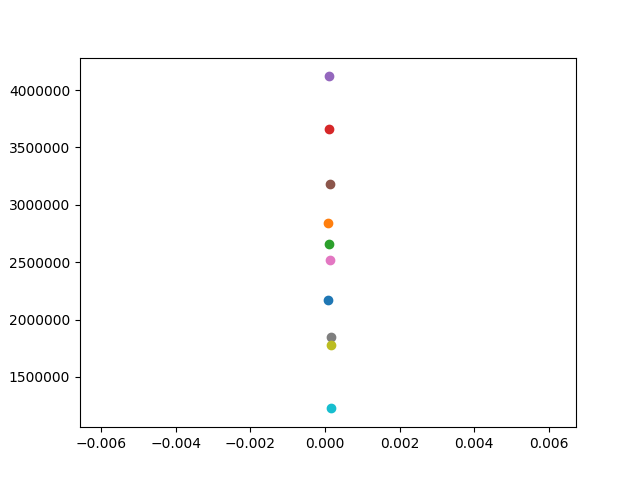

In [5]:
trade = 6000
%matplotlib notebook
fig, ax = plt.subplots(nrows=1, ncols=1)
for es in r_es:
    with pd.HDFStore('/home/jakob/Project_MayaSim/output_data/X10_trajectories/results/all_trajectories.hd5') as store:
        df = store.select('d1', where=f'r_trade = {trade} & r_es = {es} & time > 400', columns=['total_population'])
        df.index = df.index.droplevel(['r_trade', 'r_es'])
        dif = None
        for rid in df.index.levels[0]:
            if dif is None:
                dif = max(df.loc[rid].values) - min(df.loc[rid].values)
            else:
                dif += max(df.loc[rid].values) - min(df.loc[rid].values)
        dif = dif/len(df.index.levels[0])
        print()
        ax.scatter(es, dif)

<IPython.core.display.Javascript object>


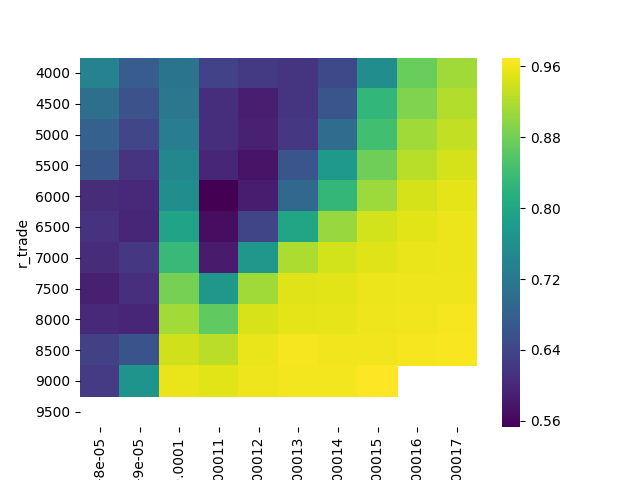

In [6]:
%matplotlib notebook
fig, ax = plt.subplots(nrows=1, ncols=1)

freqs = None

for rid in df.index.levels[0]:
    if freqs is None:
        freqs = np.fft.rfft(df.loc[rid].values)
    else:
        freqs += np.fft.rfft(df.loc[rid].values)
dt = [np.real(x[0]) for x in freqs]
ax.plot(dt)

try:
    empty_df = pd.read_pickle('permutation_entropies.pkl')
except:
    print('no file, create new')

In [106]:
# from https://github.com/nikdon/pyEntropy
from pyentrp import entropy as entrp

with pd.HDFStore('/home/jakob/Project_MayaSim/output_data/X10_trajectories/results/all_trajectories.hd5') as store:
    
    f = IntProgress(min=0, max=len(empty_df)) # instantiate the bar
    display(f) # display the bar
    
    for ind, row in empty_df.iterrows():
        # increase bar
        f.value += 1
        
        # check, if already calculated,
        if np.isnan(row['e']):
            # if not, load time series
            df = store.select('d1', where=f'r_trade = {ind[0]} & r_es = {ind[1]} & run_id = {ind[2]} & time > 400', columns=['total_population'])
            
            # if timeseries contains data, calculate permutation entropy
            if len(df.values[:,0])>0:
                e = entrp.permutation_entropy(df.values[:,0], normalize=True)
            else:
                e = float('nan')
            # and save.
            empty_df.loc[ind, 'e'] = e
        
    

IntProgress(value=0, max=4080)

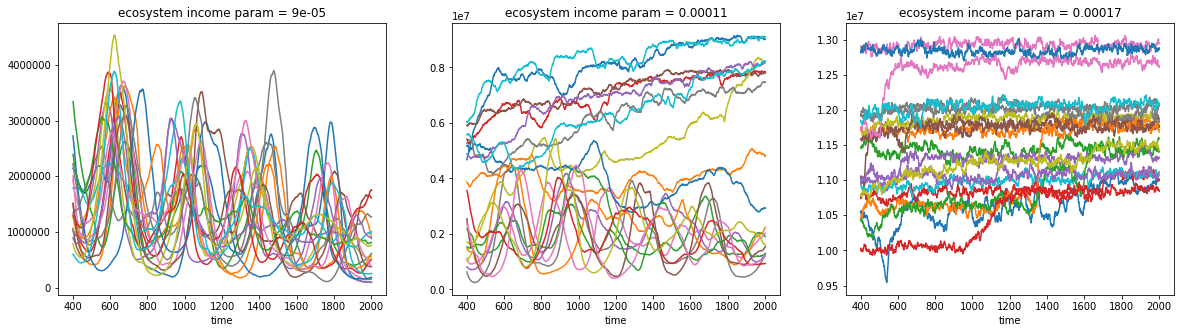

In [107]:
%matplotlib inline
import seaborn as sns

r_ess = [0.00009, 0.00011, 0.00017]
r_trade=7500

fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_figwidth(20)
fig.set_figheight(5)

df = pd.DataFrame(columns=['r_es', 'r_trade'], data=np.array([r_ess,[r_trade, r_trade, r_trade]]).T)

results = tmp.min(level=[0,1])

with pd.HDFStore('/home/jakob/Project_MayaSim/output_data/X10_trajectories/results/all_trajectories.hd5') as store:
    df = store.select('d1', where=f'r_trade = {r_trade} & r_es = {r_ess} & time > 400', columns=['total_population'])

ann = pd.DataFrame(index=results.index, columns=['ann'], data='')
for i, r_es in enumerate(r_ess):
    df.loc[(r_trade, r_es)].unstack('run_id').plot(ax=ax[i], legend=False)
    ax[i].set_title(f'ecosystem income param = {r_es}')
    ann.loc[(r_trade, r_es), 'ann'] = 'x'

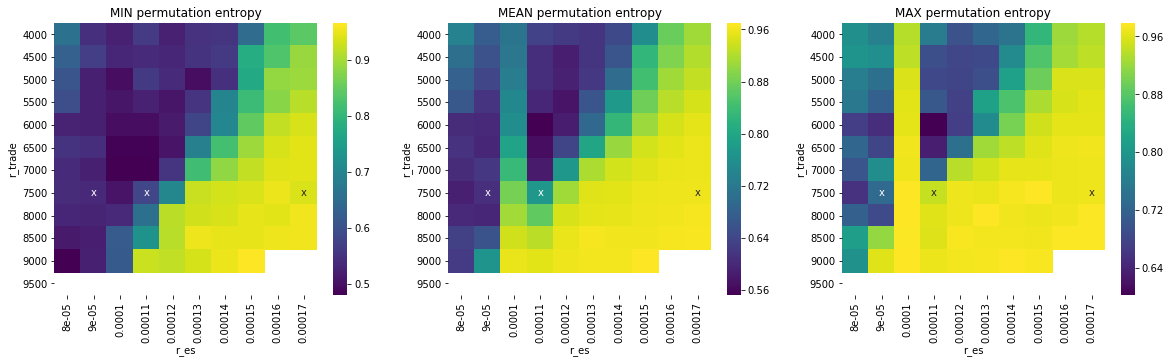

In [103]:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_figwidth(20)
fig.set_figheight(5)

results = tmp.min(level=[0,1])
results.unstack('r_es')
sns.heatmap(results['e'].unstack('r_es'), fmt='s', cmap='viridis', ax=ax[0], annot=ann.unstack('r_es'))
ax[0].set_title('MIN permutation entropy')

results = tmp.mean(level=[0,1])
results.unstack('r_es')
sns.heatmap(results['e'].unstack('r_es'), fmt='s', cmap='viridis', ax=ax[1], annot=ann.unstack('r_es'))
ax[1].set_title('MEAN permutation entropy')

results = tmp.max(level=[0,1])
results.unstack('r_es')
sns.heatmap(results['e'].unstack('r_es'), fmt='s', cmap='viridis', ax=ax[2], annot=ann.unstack('r_es'))
ax[2].set_title('MAX permutation entropy')